Source: [Introduction to deep learning](https://carpentries-incubator.github.io/deep-learning-intro/02-keras/index.html)

# Introduction
In this episode we will learn how to create and train a Neural Network using Keras to solve a simple classification task.

The goal of this episode is to quickly get your hands dirty in actually defining and training a neural network, without going into depth of how neural networks work on a technical or mathematical level. We want you to go through the most commonly used deep learning workflow that was covered in the introduction. As a reminder below are the steps of the deep learning workflow:

- Formulate / Outline the problem
- Identify inputs and outputs
- Prepare data
- Train the model
- Perform a Prediction/Classification
- Measure performance
- Tune model
- Save model

In this episode we will focus on a minimal example for each of these steps, later episodes will build on this knowledge to go into greater depth for some or all of these steps.

# 1. Formulate/outline the problem: penguin classification
In this episode we will be using the penguin dataset, this is a dataset that was published in 2020 by Allison Horst and contains data on three different species of the penguins.

We will use the penguin dataset to train a neural network which can classify which species a penguin belongs to, based on their physical characteristics.

## Goal
The goal is to predict a penguins’ species using the attributes available in this dataset.

The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. The physical attributes measured are flipper length, beak length, beak width, body mass, and sex.
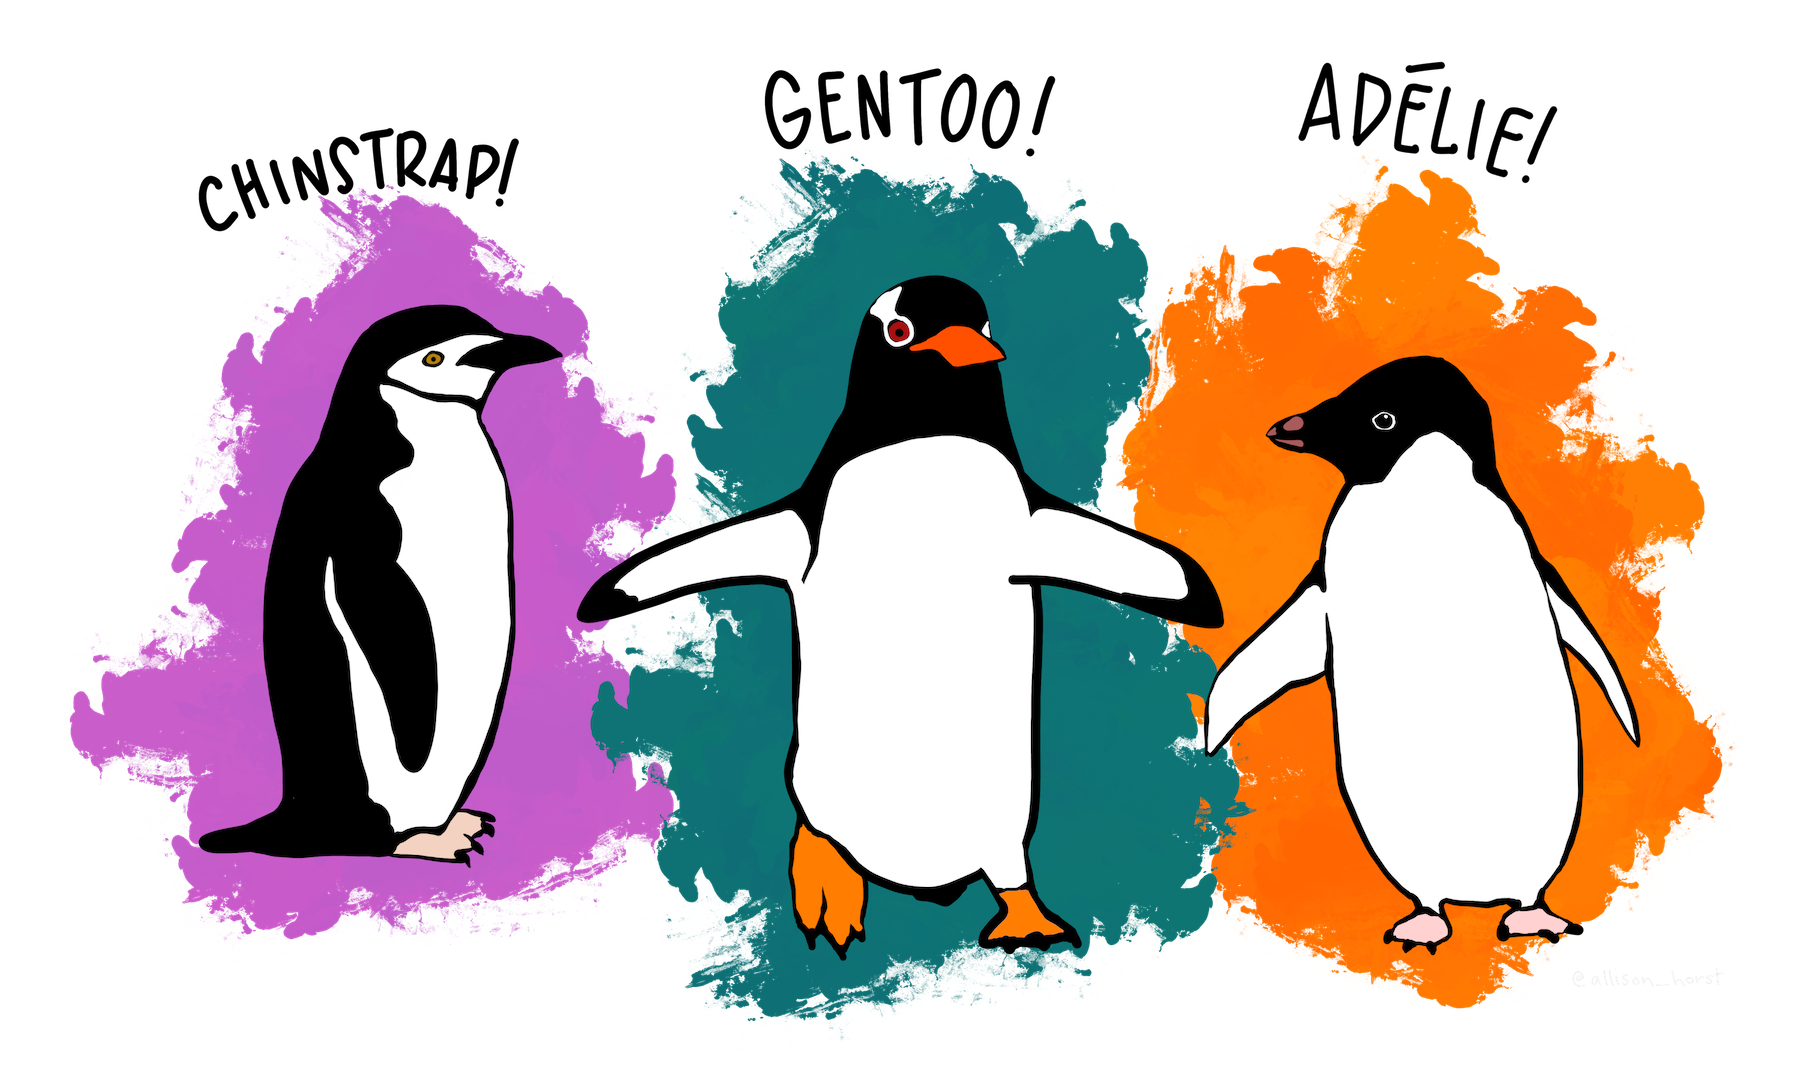
Illustration of the three species of penguins found in the Palmer Archipelago, Antarctica: Chinstrap, Gentoo and AdeleArtwork by @allison_horst
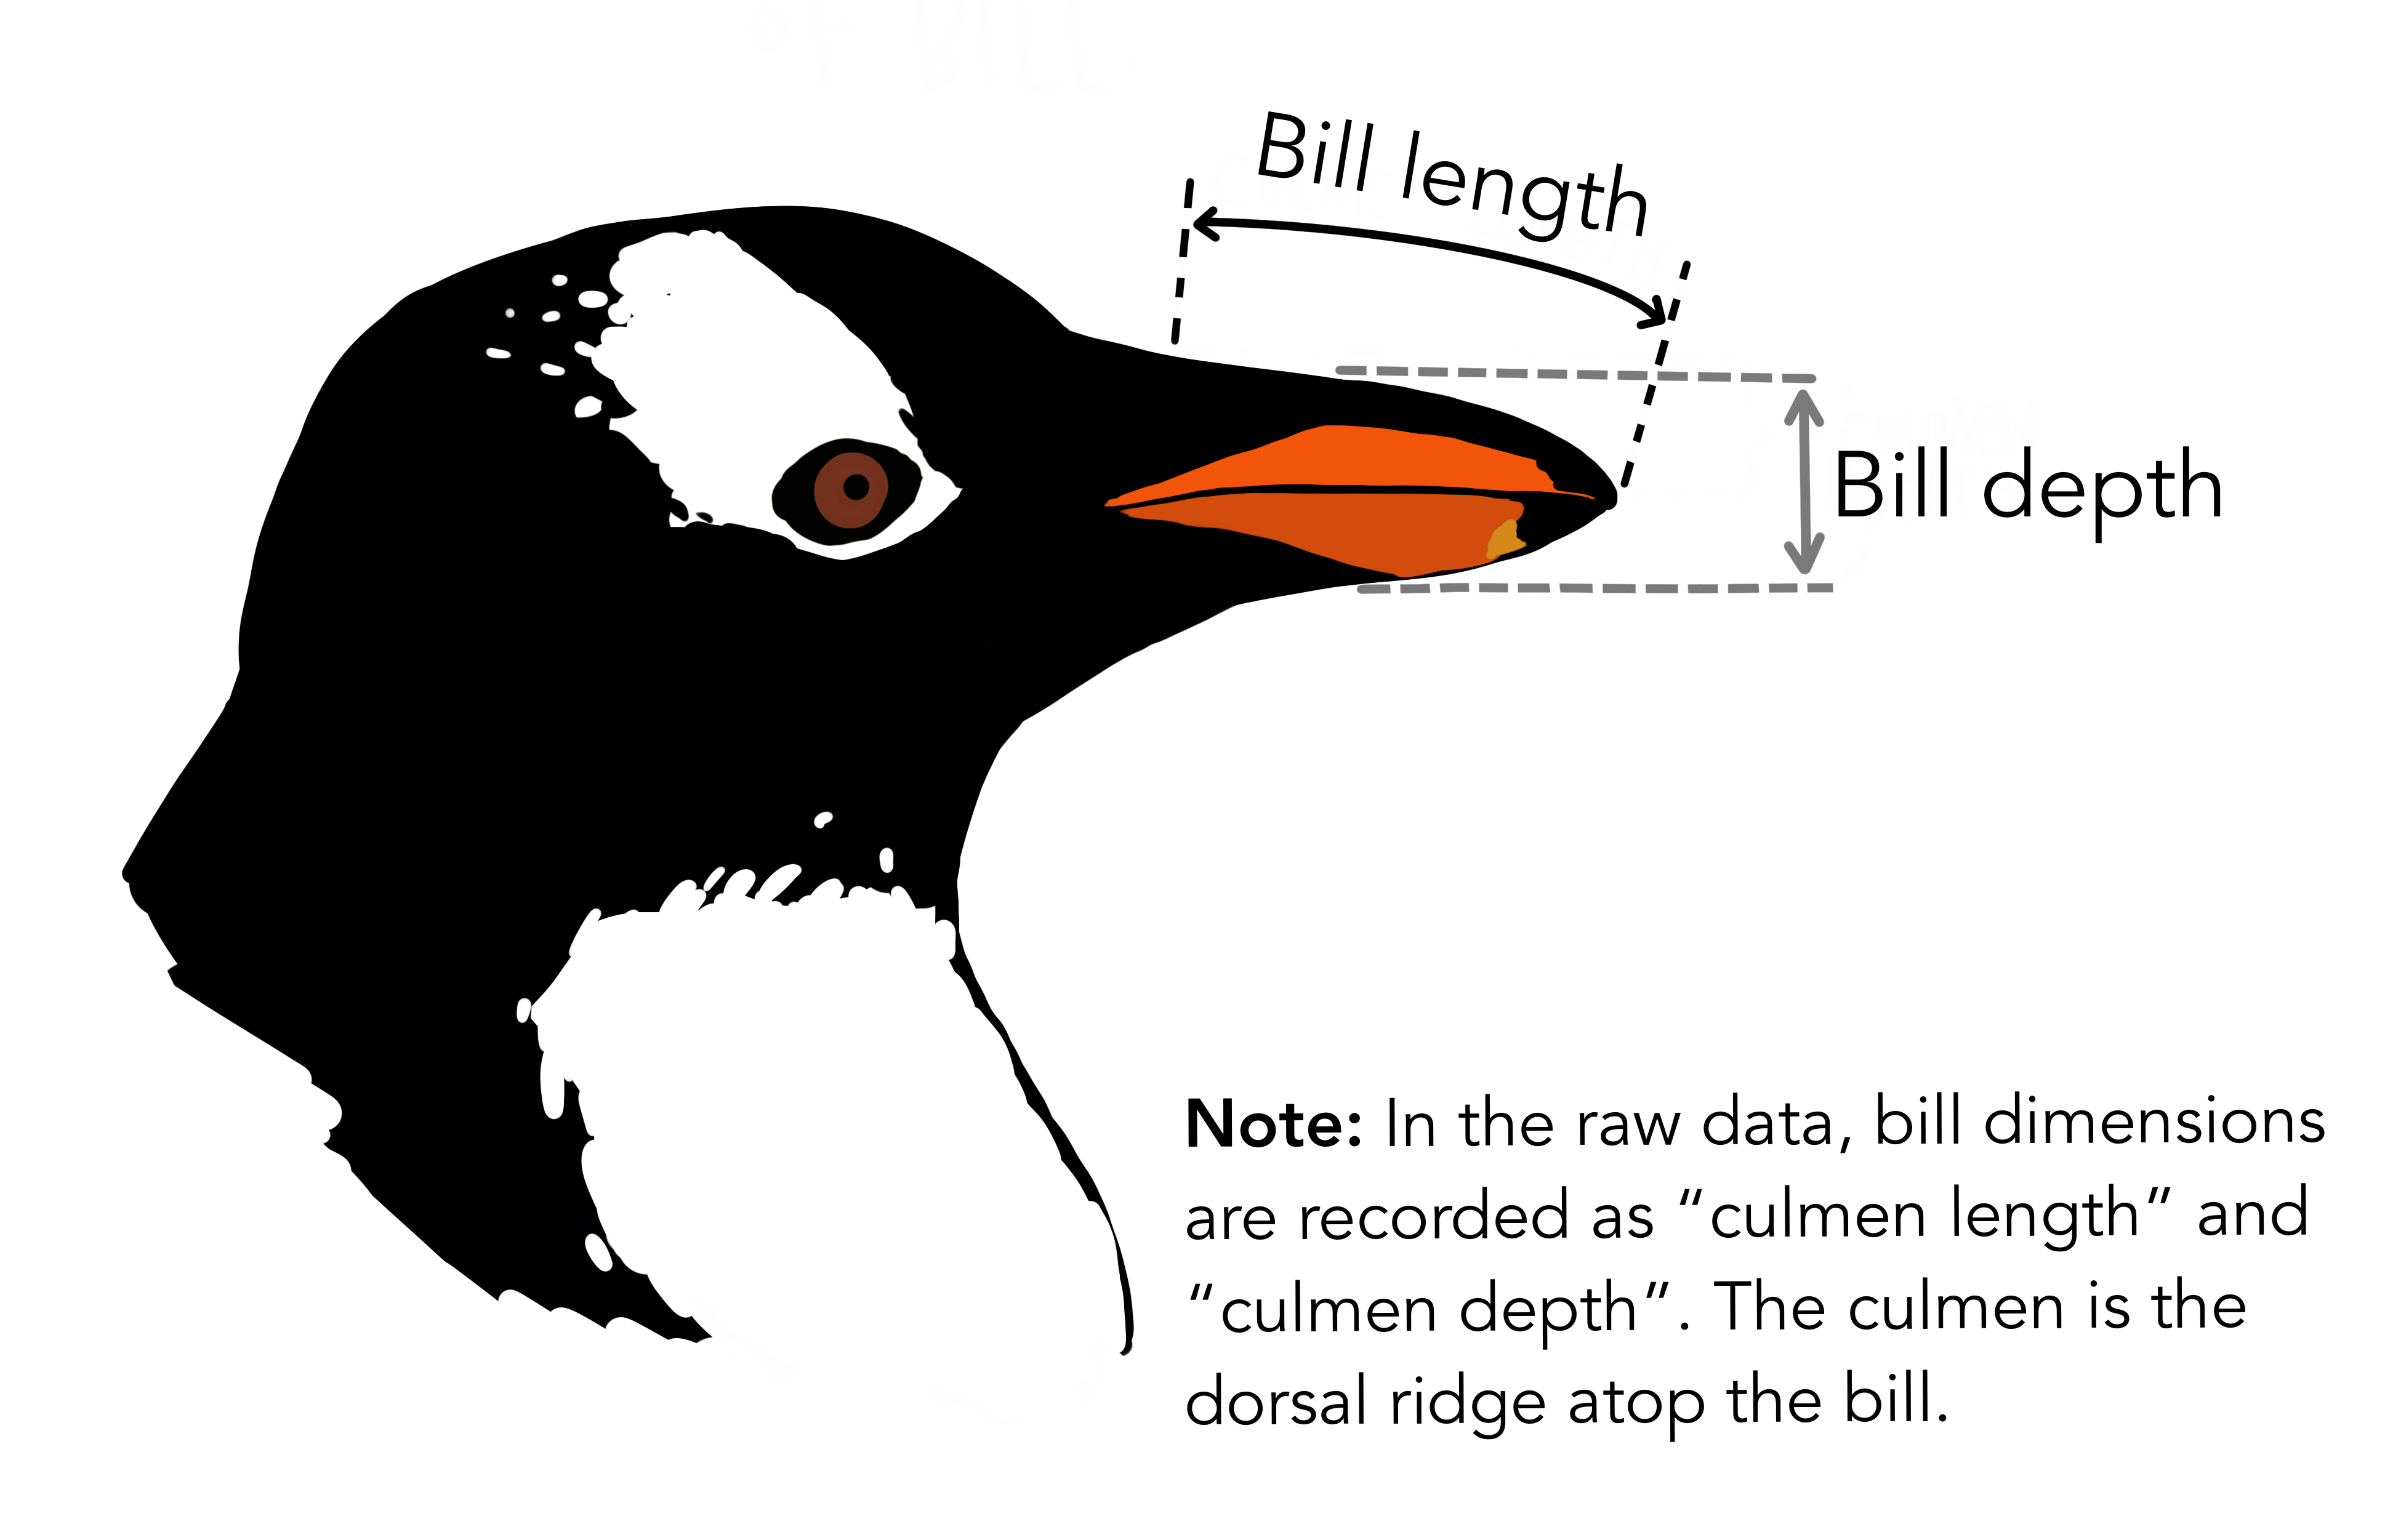
Illustration of the beak dimensions called culmen length and culmen depth in the datasetArtwork by @allison_horst

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were imported directly from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license (“No Rights Reserved”) in accordance with the Palmer Station Data Policy.

2. Identify inputs and outputs
To identify the inputs and outputs that we will use to design the neural network we need to familiarize ourselves with the dataset. This step is sometimes also called data exploration.

We will start by importing the Seaborn library that will help us get the dataset and visualize it. Seaborn is a powerful library with many visualizations. Keep in mind it requires the data to be in a pandas dataframe, luckily the datasets available in seaborn are already in a pandas dataframe.



In [2]:
import seaborn as sns

We can load the penguin dataset using

In [3]:
penguins = sns.load_dataset('penguins')

This will give you a pandas dataframe which contains the penguin data.

## Exercise: penguin dataset
Inspect the penguins dataset.

1. What are the different features called in the dataframe?
2. Are the target classes of the dataset stored as numbers or strings?
3. How many samples does this dataset have?

## Visualization
Looking at numbers like this usually does not give a very good intuition about the data we are working with, so let us create a visualization.

### Pair Plot
One nice visualization for datasets with relatively few attributes is the Pair Plot. This can be created using sns.pairplot(...). It shows a scatterplot of each attribute plotted against each of the other attributes. By using the hue='species' setting for the pairplot the graphs on the diagonal are layered kernel density estimate plots for the different values of the species column.

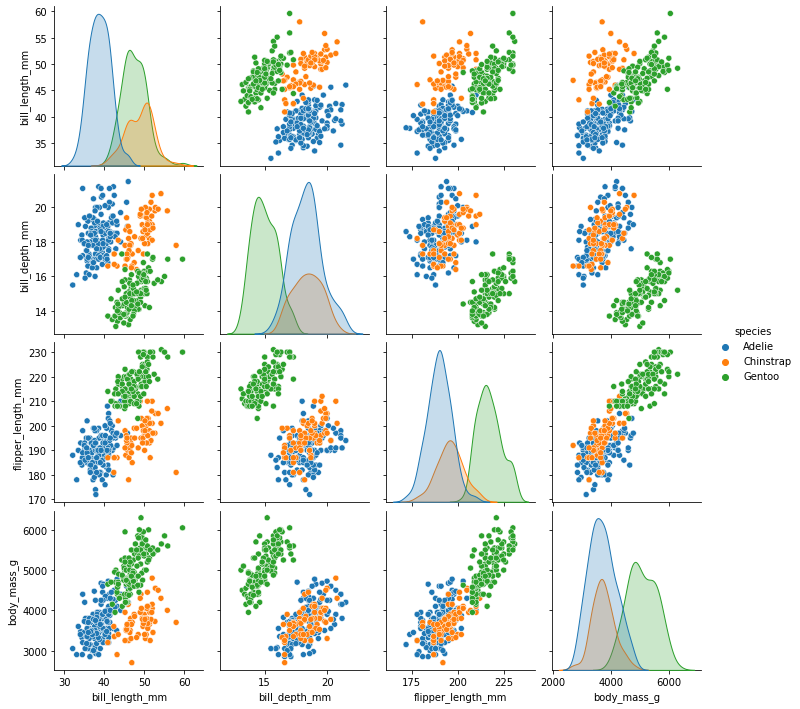

In [5]:
sns.pairplot(penguins, hue="species")

Take a look at the pairplot we created. Consider the following questions:

- Is there any class that is easily distinguishable from the others?
- Which combination of attributes shows the best separation for all 3 class labels at once?

# Input and Output Selection
Now that we have familiarized ourselves with the dataset we can select the data attributes to use as input for the neural network and the target that we want to predict.

In the rest of this episode we will use the bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g attributes. The target for the classification task will be the species.

## Data Exploration
Exploring the data is an important step to familiarize yourself with the problem and to help you determine the relevant inputs and outputs.

# 3. Prepare data
The input data and target data are not yet in a format that is suitable to use for training a machine learning model

## Change types if needed
First, the species column is our categorical target, however pandas still sees it as the generic type Object. We can convert this to the pandas categorical type:

In [7]:
penguins['species'] = penguins['species'].astype('category')

# Clean missing values
During the exploration phase you may have noticed that some rows in the dataset have missing (NaN) values, leaving such values in the input data will ruin the training, so we need to deal with them. There are many ways to deal with missing values, but for now we will just remove the offending rows by adding a call to dropna():

In [8]:
# Drop two columns and the rows that have NaN values in them
penguins_filtered = penguins.drop(columns=['island', 'sex']).dropna()

# Extract columns corresponding to features
penguins_features = penguins_filtered.drop(columns=['species'])

## Prepare target data for training
Second, the target data is also in a format that cannot be used in training. A neural network can only take numerical inputs and outputs, and learns by calculating how “far away” the species predicted by the neural network is from the true species. When the target is a string category column as we have here it is very difficult to determine this “distance” or error. Therefore we will transform this column into a more suitable format. Again there are many ways to do this, however we will be using the one-hot encoding. This encoding creates multiple columns, as many as there are unique values, and puts a 1 in the column with the corresponding correct class, and 0’s in the other columns. For instance, for a penguin of the Adelie species the one-hot encoding would be 1 0 0

Fortunately pandas is able to generate this encoding for us.

In [9]:
import pandas as pd

target = pd.get_dummies(penguins_filtered['species'])
target.head() # print out the top 5 to see what it looks like.

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


## Split data into training and test set
Finally, we will split the dataset into a training set and a test set. As the names imply we will use the training set to train the neural network, while the test set is kept separate. We will use the test set to assess the performance of the trained neural network on unseen samples. In many cases a validation set is also kept separate from the training and test sets (i.e. the dataset is split into 3 parts). This validation set is then used to select the values of the parameters of the neural network and the training methods. For this episode we will keep it at just a training and test set however.

To split the cleaned dataset into a training and test set we will use a very convenient function from sklearn called train_test_split. This function takes a number of parameters:

- The first two are the dataset and the corresponding targets.
- Next is the named parameter test_size this is the fraction of the dataset that is used for testing, in this case 0.2 means 20% of the data will be used for testing.
- random_state controls the shuffling of the dataset, setting this value will reproduce the same results (assuming you give the same integer) every time it is called.
- shuffle which can be either True or False, it controls whether the order of the rows of the dataset is shuffled before splitting. It defaults to True.
- stratify is a more advanced parameter that controls how the split is done. By setting it to target the train and test sets the function will return will have roughly the same proportions (with regards to the number of penguins of a certain species) as the dataset.


## Exercise: Training and test sets
Take a look at the training and test set we created.

- How many samples do the training and test sets have?
- Are the classes in the training set well balanced?